In [5]:
from src.smth2matrix.shift2zero import shift2zero
import numpy as np
from src.greedy_alg.class_pallets import Pallets
from src.class_item import Item

from copy import copy


from src.class_packing import Packing
from src.smth2lines.polygon2segments import polygon2segments

h = 0.4

points_1 = np.array([[2.69237845, 1.63793684],
 [1.95117113, 1.63040555],
 [1.77754656, 2.06814054],
 [1.33105288, 2.14140241],
 [0.83088898, 2.08956865],
 [0.58569905, 1.65617245],
 [0.75592693, 1.17908709],
 [0.,        0.53517465],
 [0.96146073, 0.53657551],
 [1.15535086, 0.        ],
 [1.62681539, 0.22654478],
 [1.72598599, 0.75646797],
 [2.29371675, 0.662793  ],
 [2.38733565, 1.05880673]])
points_2 = np.array([[2.35439835, 0.56682611],
 [2.16875126, 0.98904251],
 [2.44932864, 1.5049757 ],
 [1.7597245,  1.31861811],
 [1.54303999, 1.04130188],
 [1.07865184, 2.08843785],
 [0.76041039, 1.6459771 ],
 [0.,        1.35575994],
 [0.18375051, 0.62003102],
 [1.12479803, 0.59726821],
 [1.33710847, 0.44340024],
 [1.66641651, 0.        ],
 [2.02125983, 0.26415272]])
points_3 =np.array([[1.8829718,  2.1891357 ],
 [0.91813093, 2.06157577],
 [0.,       0.78321165],
 [1.53272948, 0.        ],
 [2.46978122, 0.79650131],
 [2.82982098, 1.78698899]])
points_4 = np.array([[2.27595331, 1.31677084],
 [2.16772668, 1.89781937],
 [1.55473952, 1.64779112],
 [1.2052099, 1.69440872],
 [0.87590571, 1.57098183],
 [0.71104329, 1.25479493],
 [0.,        1.02602166],
 [0.09604511, 0.47342114],
 [0.621841,  0.22571035],
 [1.08473661, 0.30082045],
 [1.33343801, 0.41250694],
 [1.68182499, 0.        ],
 [1.9929434,  0.19124784],
 [2.78628922, 0.25556964],
 [1.71594976, 0.86400211]])
points_5 = np.array([[0.19589181, 0.        ],
 [0.72333804, 0.00373399],
 [1.33190352, 0.0267869 ],
 [1.21501926, 0.64732384],
 [0.88292715, 1.07051346],
 [0.61747334, 0.55599024],
 [0.,        0.52387383]])

polygons = [copy(points_1), copy(points_2), copy(points_3), copy(points_4),copy(points_5)]

# lines = polygon2segments(points, h)
# print(lines)

packing = Packing(width=10, height=10, drill_radius=0)

pallets = Pallets([10, 10])
pallets.grid_step = h
pallets.add_pallet_lines()

print(pallets.pallet_lines)


[[[0, 0], [10, 10]], [[0, 0], [10, 10]], [[0, 0], [10, 10]], [[0, 0], [10, 10]], [[0, 0], [10, 10]], [[0, 0], [10, 10]], [[0, 0], [10, 10]], [[0, 0], [10, 10]], [[0, 0], [10, 10]], [[0, 0], [10, 10]], [[0, 0], [10, 10]], [[0, 0], [10, 10]], [[0, 0], [10, 10]], [[0, 0], [10, 10]], [[0, 0], [10, 10]], [[0, 0], [10, 10]], [[0, 0], [10, 10]], [[0, 0], [10, 10]], [[0, 0], [10, 10]], [[0, 0], [10, 10]], [[0, 0], [10, 10]], [[0, 0], [10, 10]], [[0, 0], [10, 10]], [[0, 0], [10, 10]], [[0, 0], [10, 10]]]


In [6]:
packing.items = np.full(len(polygons), None)
print('hello')
for id in range(len(polygons)):
    item = Item(id, polygons[id])
    packing.items[id] = item

print('hello')
packing.pallets = pallets
print('hello')
packing.h = h
packing.add_segments_for_items()

hello
hello
hello


In [7]:
def pack_item(item, pallets, t_vector, r):
    item.t_vector = [t_vector, r]
    item.packed = True
    for s in range(len(item.segments)):
        for l in range(len(item.segments[s])):
            new_line = [copy(item.segments[s][l][0]) + copy(item.t_vector[0]), copy(item.segments[s][l][1]) + copy(item.t_vector[0])]
            pallets.pallet_lines[r+s].append(copy(new_line))
        pallets.pallet_lines[r+s].sort(key=lambda x: int(x[0]), reverse=False)

def pack_segments(items, pallets):
    for item in items:
        r = 0
        while r < len(pallets.pallet_lines) and item.packed == False:
            row = pallets.pallet_lines[r]
            k = 1
            ex_flag = 0
            while k < len(row) and item.packed == False and ex_flag == 0:
                t_vector = row[k-1][1] - item.segments[0][0][0]
                i = 0
                l = len(item.segments[0])
                while i < len(item.segments) and r + i < len(pallets.pallet_lines) and ex_flag == 0:
                        j = 0
                        while j < len(item.segments[i]) and ex_flag == 0:
                            m = 0
                            while m < len(pallets.pallet_lines[r+i]) and ex_flag == 0:
                                # случаи пересечения линии и упаковки
                                if pallets.pallet_lines[r+i][m][0] <= item.segments[i][j][0] + t_vector < pallets.pallet_lines[r+i][m][1]:
                                    t_vector += pallets.pallet_lines[r+i][m][1] - (item.segments[i][j][0] + t_vector)
                                    i = 0
                                elif pallets.pallet_lines[r+i][m][0] <= item.segments[i][j][1] + t_vector < pallets.pallet_lines[r+i][m][1]:
                                    t_vector += pallets.pallet_lines[r+i][m][1] - (item.segments[i][j][0] + t_vector)
                                    i = 0
                                # объект выходит за границы палеты
                                elif item.segments[i][j][0] + t_vector < 0:
                                    t_vector = - item.segments[i][j][0]
                                    i = 0
                                # наверное надо сделать это первым условием, будет чаще всего встречаться
                                elif item.segments[i][j][1] + t_vector > pallets.shape[0]:
                                    ex_flag = 1
                                m += 1
                            j += 1
                        i+=1
                # если объект влезает, добавляем его на палету
                if ex_flag == 0:
                    pack_item(item, pallets, t_vector, r)
                    ex_flag = 1
                k+=1
            r+=1


pack_segments(packing.items, packing.pallets)


[-0.0, 0]
[2.69237845, 0]
[5.141707090000001, 0]
[2.1284260800401293, 5]
[7.612760074943019, 0]


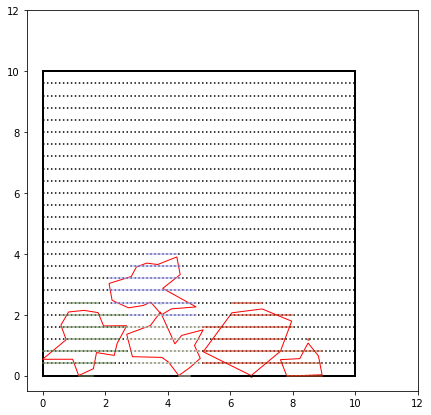

In [8]:
import random
from matplotlib import pyplot as plt, patches

pallet_width = 10
pallet_height = 10

fig, ax = plt.subplots()

MAX_SIZE = 7
if pallet_width > pallet_height:
    fig.set_figheight(MAX_SIZE)
    fig.set_figwidth(
        MAX_SIZE * pallet_width/pallet_height)
else:
    fig.set_figheight(
        MAX_SIZE * pallet_height/pallet_width)
    fig.set_figwidth(MAX_SIZE)

pallet = patches.Rectangle((0, 0),
                            pallet_width,
                            pallet_height,
                            linewidth=2,
                            facecolor='none',
                            edgecolor='black')
ax.add_patch(pallet)
ax.set_xlim(-0.5, pallet_width + 2)
ax.set_ylim(-0.5, pallet_height + 2)

for i in range(int(pallet_height/h)):
    plt.plot([0, pallet_width], [i*h, i*h], linestyle = 'dotted', color = 'black')


for polygon in packing.items:
    print(polygon.t_vector)
    for point in polygon.points:
        point[0] += polygon.t_vector[0]
        point[1] += polygon.t_vector[1]*h
    figure = patches.Polygon(polygon.points,
                            linewidth=1,
                            edgecolor='red',
                            fill=False)
    ax.add_patch(figure)
    random_color = "#" + \
                ''.join([random.choice('0123456789ABCDEF') for j in range(6)])
    for i in range(len(polygon.segments)):
        for sigment in polygon.segments[i]:
            sigment[0]+=polygon.t_vector[0]
            sigment[1]+=polygon.t_vector[0]
            if sigment[0] != sigment[1]:
                plt.plot(sigment, [(i+polygon.t_vector[1])*h, (i+polygon.t_vector[1])*h], color = random_color, alpha=0.7)
            else:
                ax.scatter(sigment[0], (i+polygon.t_vector[1])*h, color = random_color, s = 4, alpha=0.7)


plt.savefig('line-packing.png')
# plt.show()